<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data (3 Marks)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/Anton', force_remount=True)

import os

project_path = "/content/Anton/My Drive/Colab Notebooks/NLP/Projects/"
os.chdir(project_path)
print(os.getcwd())

Mounted at /content/Anton
/content/Anton/My Drive/Colab Notebooks/NLP/Projects


In [3]:
import pandas as pd

df = pd.read_json('./Sarcasm_Headlines_Dataset.json',lines=True)

df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


### Drop `article_link` from dataset (3 Marks)

In [4]:
df.drop(['article_link'], inplace=True, axis=1)

Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

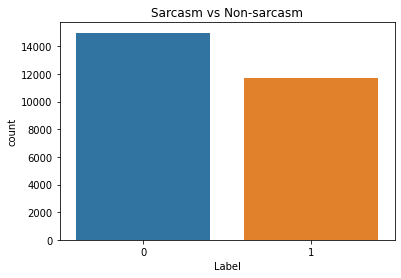

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['is_sarcastic'])
plt.xlabel('Label')
plt.title('Sarcasm vs Non-sarcasm')

### Get length of each headline and add a column for that (3 Marks)

In [6]:
import re

df1 = df
df1['headline'] = df1['headline'].apply(lambda s: s.lower())
df1['headline'] = df1['headline'].apply(lambda s: re.sub('[^0-9a-z #+_]',' ',s))
df1['headline'] = df1['headline'].apply(lambda s: re.sub('[^\w]',' ',s))
df1['headline'] = df1['headline'].apply(lambda s: re.sub(' +', ' ',s))
df1['headline'] = df1['headline'].apply(lambda s: s.strip())

df1.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret bl...,0
1,the roseanne revival catches up to our thorny ...,0
2,mom starting to fear son s web series closest ...,1
3,boehner just wants wife to listen not come up ...,1
4,j k rowling wishes snape happy birthday in the...,0


In [7]:
df1["Sent Count"] = df1['headline'].str.split().str.len()

df1.head()

,headline,is_sarcastic,Sent Count
0,former versace store clerk sues over secret bl...,0,12
1,the roseanne revival catches up to our thorny ...,0,14
2,mom starting to fear son s web series closest ...,1,15
3,boehner just wants wife to listen not come up ...,1,14
4,j k rowling wishes snape happy birthday in the...,0,12


### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [8]:
max_features = 10000
maxlen = 25
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words (3 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df1['headline'].values)
X = tokenizer.texts_to_sequences(df1['headline'].values)

### Pad sequences (3 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen=maxlen)

In [11]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(df1['is_sarcastic'], num_classes=2)

In [12]:
y

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

### Vocab mapping
- There is no word for 0th index

In [14]:
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 's': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'trump': 11,
 'is': 12,
 'new': 13,
 'man': 14,
 'from': 15,
 'at': 16,
 'you': 17,
 't': 18,
 'it': 19,
 'about': 20,
 'this': 21,
 'by': 22,
 'after': 23,
 'up': 24,
 'out': 25,
 'be': 26,
 'that': 27,
 'how': 28,
 'he': 29,
 'as': 30,
 'not': 31,
 'what': 32,
 'can': 33,
 'are': 34,
 'your': 35,
 'his': 36,
 'who': 37,
 'all': 38,
 'just': 39,
 'has': 40,
 'will': 41,
 'year': 42,
 'more': 43,
 'one': 44,
 'into': 45,
 'report': 46,
 'i': 47,
 'why': 48,
 'have': 49,
 'area': 50,
 'over': 51,
 'woman': 52,
 'donald': 53,
 'day': 54,
 'u': 55,
 'says': 56,
 'time': 57,
 'first': 58,
 'obama': 59,
 'no': 60,
 'like': 61,
 'women': 62,
 'people': 63,
 'get': 64,
 'her': 65,
 'old': 66,
 'world': 67,
 'off': 68,
 'we': 69,
 'life': 70,
 'an': 71,
 'nation': 72,
 'now': 73,
 'house': 74,
 'clinton': 75,
 'they': 76,
 'make': 77,
 'still': 78,
 'white': 79,
 'back': 80,
 'was': 81,
 't

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [15]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

25318


### Load Glove Word Embeddings (3 Marks)

In [16]:
!ls

 glove.6B.200d.txt
'Questions - Project 2 - Sequential Models in NLP - Sarcasm Detection.ipynb'
 Sarcasm_Headlines_Dataset.json
'Sequence Model in NLP_R9_Project1_Sentiment Classification.ipynb'
'Statistical NLP_Project.ipynb'


### Create embedding matrix

In [17]:
import numpy as np

EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

### Define model (5 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [32]:
from tensorflow.keras.backend import clear_session

clear_session()

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Activation, Dense, Dropout, Input, Embedding, Flatten

embed_dim = 128

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length = X.shape[1]))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dense(2,activation='sigmoid'))


### Compile the model (3 Marks)

In [34]:
from tensorflow.keras.optimizers import Adam

opt = Adam()
model.compile(loss = 'binary_crossentropy', optimizer=opt ,metrics = ['accuracy'])


### Fit the model (4 Marks)

In [35]:
batch_size = 32
history = model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size, verbose = 2, validation_data=(X_test,Y_test))

Epoch 1/20
668/668 - 19s - loss: 0.4965 - accuracy: 0.8000 - val_loss: 0.4336 - val_accuracy: 0.8313
Epoch 2/20
668/668 - 19s - loss: 0.2786 - accuracy: 0.9004 - val_loss: 0.3528 - val_accuracy: 0.8643
Epoch 3/20
668/668 - 18s - loss: 0.1622 - accuracy: 0.9422 - val_loss: 0.3796 - val_accuracy: 0.8519
Epoch 4/20
668/668 - 18s - loss: 0.0908 - accuracy: 0.9687 - val_loss: 0.5603 - val_accuracy: 0.8418
Epoch 5/20
668/668 - 18s - loss: 0.0466 - accuracy: 0.9848 - val_loss: 0.6514 - val_accuracy: 0.8465
Epoch 6/20
668/668 - 18s - loss: 0.0245 - accuracy: 0.9914 - val_loss: 0.8322 - val_accuracy: 0.8405
Epoch 7/20
668/668 - 18s - loss: 0.0173 - accuracy: 0.9941 - val_loss: 1.0746 - val_accuracy: 0.8441
Epoch 8/20
668/668 - 18s - loss: 0.0117 - accuracy: 0.9962 - val_loss: 1.1577 - val_accuracy: 0.8431
Epoch 9/20
668/668 - 18s - loss: 0.0096 - accuracy: 0.9972 - val_loss: 1.1797 - val_accuracy: 0.8431
Epoch 10/20
668/668 - 18s - loss: 0.0085 - accuracy: 0.9972 - val_loss: 1.2077 - val_accura

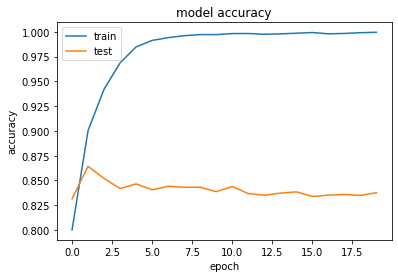

In [36]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

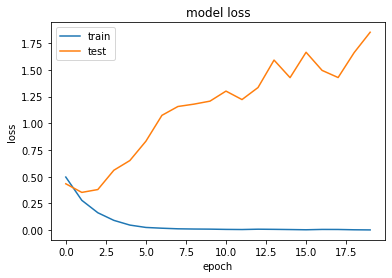

In [37]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
Y_pred = model.predict_classes(X_test)

In [39]:
y_test_classes = [np.argmax(y, axis=None, out=None) for y in Y_test]

In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_classes, Y_pred)

array([[2592,  404],
       [ 464, 1882]])